In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
from numpy.random import multivariate_normal
from sklearn.metrics import adjusted_rand_score

# K-Means

In [120]:
x = multivariate_normal(mean=[1,1], cov = [[1,0],[0,1]], size=200)
y = multivariate_normal(mean=[5,5], cov = [[1,0],[0,1]], size=200)
z = multivariate_normal(mean=[10,10], cov = [[1,0],[0,1]], size=200)

In [121]:
d = np.concatenate([x,y,z], axis=0)

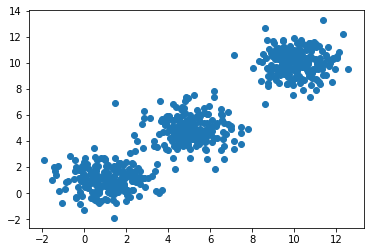

In [122]:
plt.scatter(d[:,0],d[:,1])

In [152]:
k = 3
membership = np.repeat(0, d.shape[0])
membership = map(lambda x:np.random.randint(0,k), membership)
membership = np.array(membership)

In [153]:
centers = np.array([])

In [154]:
len(membership)

600

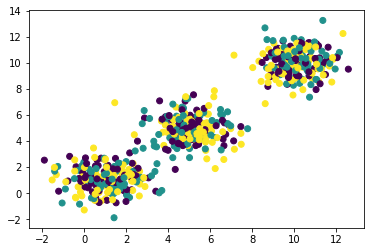

In [155]:
plt.scatter(d[:,0],d[:,1],c=membership)

In [156]:
centers = None
print centers
print np.bincount(membership)

None
[192 192 216]


In [157]:
#centers function
centers = None
for i in range(3):
    c = np.array(d[membership == i,:].mean(axis=0))
    print c
    if centers is None:
        centers = np.array(c)
    else:
        centers = np.concatenate((centers, c))
    #centers = np.concatenate((centers, d[membership == i,:].mean(axis=0)), axis=1)
#print centers.reshape(3,2)
centers = centers.reshape(3,2)

[ 5.39092644  5.43103105]
[ 5.43037966  5.32420241]
[ 5.40246876  5.24671672]


In [158]:
centers

array([[ 5.39092644,  5.43103105],
       [ 5.43037966,  5.32420241],
       [ 5.40246876,  5.24671672]])

In [159]:
print sum((d[0] - centers[2])**2)

34.9359680206


In [161]:
for i in range(10): #iterations, ideally this should run until no membership flipping happens
    #I have old centers
    #compute the distance of each distance
    #update new membership
    new_membership = map(lambda j:np.argmin(np.array(map(lambda q:np.sum((d[j] - centers[q]) ** 2), range(k)))), range(len(membership)))
    new_membership = np.array(new_membership)
    
    print adjusted_rand_score(membership, new_membership) #when this is close to 1 or it's within 1 - epsilon, stop iterating
    
    membership = new_membership
    #update centers
    #centers function
    centers = None
    for i in range(k):
        c = np.array(d[membership == i,:].mean(axis=0))
        if centers is None:
            centers = np.array(c)
        else:
            centers = np.concatenate((centers, c))
        #centers = np.concatenate((centers, d[membership == i,:].mean(axis=0)), axis=1)
    #print centers.reshape(3,2)
    centers = centers.reshape(3,2)
    
print centers

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
[[ 10.09298738  10.03444794]
 [  5.06268572   4.91807986]
 [  1.06744702   1.03895037]]


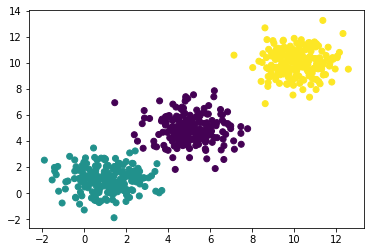

In [149]:
plt.scatter(d[:,0], d[:,1], c=membership)

# Dynamic Programming, find longest sequence

In [179]:
string_1 = 'abcdefgh'
string_2 = 'acdegh'

#define distances
def longest_sub(a,b):
    mx = np.zeros([len(a)+1,len(b)+1], dtype=np.int)
    for i in range(len(a)):
        for j in range(len(b)):
            mx[i+1,j+1] = np.max(np.array([mx[i,j], mx[i+1,j], mx[i,j+1]])) + (1 if string_1[i] == string_2[j] else 0) 
    
    #print mx
    return mx.max()
    
longest_sub(string_1,string_2)

6

# Fibonacci sequence

In [184]:
def fib(x):
    if x <= 0:
        return 0
    if x == 1:
        return 1
    if x == 2:
        return 1
    else:
        return fib(x-1) + fib(x-2)

print fib(1)
print fib(2)
print fib(3)
print fib(4)
print fib(5)

1
1
2
3
5


# Generate all possible Combinations

In [185]:
h = {'2':'abc', '3':'def', '4':'ghi', '5':'jkl', '6':'mno', '7':'pqrs', '8':'tuv', '9':'wxyz'}

In [209]:
#plain solution
def gen_letters(s):
    l = []
    for i,c in enumerate(s):
        #print c
        letters = h[c]
        if i == 0:
            for k in letters:
                l.append(k)
        else:
            l_t = []
            for p in xrange(len(l)):
                for q in xrange(len(letters)):
                    l_t.append( l[p] + letters[q])
            l = l_t
    return l
    
print gen_letters('234')

['adg', 'adh', 'adi', 'aeg', 'aeh', 'aei', 'afg', 'afh', 'afi', 'bdg', 'bdh', 'bdi', 'beg', 'beh', 'bei', 'bfg', 'bfh', 'bfi', 'cdg', 'cdh', 'cdi', 'ceg', 'ceh', 'cei', 'cfg', 'cfh', 'cfi']


In [207]:
#recursion solution
def gen_letters_rec(s):
    if len(s) == 1:
        return list(h[s])
    else:
        l = gen_letters_rec(s[:-1]) #get the last step sequences
        letters = h[s[-1]] #extract last letter
        l_t = []
        for i,p in enumerate(letters):
            for j,q in enumerate(l):
                l_t.append(q+p)
        #brand new l_t
        return l_t
    
print gen_letters_rec('234')

['adg', 'bdg', 'cdg', 'aeg', 'beg', 'ceg', 'afg', 'bfg', 'cfg', 'adh', 'bdh', 'cdh', 'aeh', 'beh', 'ceh', 'afh', 'bfh', 'cfh', 'adi', 'bdi', 'cdi', 'aei', 'bei', 'cei', 'afi', 'bfi', 'cfi']


# Generate permutations

In [224]:
#generate all possible 0,1, similar to this problem 
#let's say I want to do choose 5, 3, how to do it?

#brute force algorithm, generate all possible 1,0,1,0s, and count how many of them have 3 1s

def gen_permute(n):
    l = []
    
    #
    for i in xrange(n):
        if i == 0:
            l = ['1', '0']
        else:
            l_t = []
            for p in xrange(2):
                for i,q in enumerate(l):
                    l_t.append(q + str(p))
            l = l_t
    #
    return l
    
#gen_permute(4), a non-optimal algorithm
print filter(lambda x:x == 3, map(lambda x:x.count('1'), gen_permute(5)))
print filter(lambda x:x.count('1') == 3, gen_permute(5))

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
['11100', '11010', '10110', '01110', '11001', '10101', '01101', '10011', '01011', '00111']


In [226]:
from sets import Set

In [227]:
a = Set()

In [230]:
for i in xrange(3, 5):
    print i

3
4


In [232]:
a = 'abcd'
a[0:4]

'abcd'

In [233]:
range(4)

[0, 1, 2, 3]

# Shuffle Arrays

In [246]:
a = range(10) #inclusive, exclusive; if it's single number 
print a
for i in range((len(a)-1)):
    for j in range(i+1,len(a)):
        if np.random.rand() < 0.5:
            t = a[i]
            a[i] = a[j]
            a[j] = t

print a

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9, 8, 2, 1, 6, 7, 3, 5, 0, 4]


# Find common ancestor of two nodes in a tree

#Pseudo code
#simple way, get the ancestors array of the node 

```python
a_ancestors = []
a
t = a
while t.get_parent() is not None:
    a_ancestors.append(t.get_parent())
    t = t.get_parent

t = b
while t.get_parent() is not None:
    b_ancestor = t.get_parent()
    #loop through all
    for i ...in a_ancestors:
        if b_ancestor == a_ancestor[i]
            return
    else:
        t = t.get_parent()
```

#nothing happens, no common ancestor - impossible!        
#there's also a recursion solution

# Find whether string is numeric

#this is easy 
```python 
re.match()
```

# Set, List operators

In [250]:
a = [1,2,3]
b = 4 
b in a

False

In [251]:
a = np.array([1,2,3])

In [252]:
b in a

False

In [254]:
from sets import Set

In [256]:
s = Set([1,2,3])
2 in s

True

In [261]:
a1 = Set([1,2,3])
a2 = Set([4,5,6])

In [263]:
a1.union(a2)

Set([1, 2, 3, 4, 5, 6])

In [265]:
a1.intersection(a2)

Set([])

In [266]:
a1.difference(a2)

Set([1, 2, 3])

In [269]:
b1 = [1,2,3]
b2 = [3,4,5]
b1 + b2 #simple concatenate

[1, 2, 3, 3, 4, 5]